In [1]:
import pandas as pd
import numpy as np
import random

In [16]:
# update_time 데이터프레임 생성
date = pd.date_range('2023-10-01 00:00:00', periods=1000, freq='10T')

# 임시 데이터 만들기
data1 = pd.DataFrame()
data1['a'] = 1

# 데이터 합치기
data = pd.DataFrame(data1, index = date)

# datetimeindex를 변수로 변경
data.reset_index(drop=False, inplace=True)

# 필요없는 변수 삭제
del data['a']

# 변수명 변경
data.rename(columns = {'index' : 'update_time'}, inplace = True)

In [17]:
# 변수와 표본 개수 설정
l_size, r_size, h_size = 10, 950, 40   # 표본 개수 (low, 정상, high)
l_mean, r_mean, h_mean = 40, 80, 120    # 평균
std = 20                                # 표준편차

# 각 변수 생성과 데이터프레임 병합
for i in range(1, 1001):
    # 각 변수별로 다른 random seed 설정
    np.random.seed(i)
    
    # 정규분포 랜덤 추출
    low = np.random.normal(l_mean, std, l_size)  # low (비정상)
    raw = np.random.normal(r_mean, std, r_size)  # 정상
    high = np.random.normal(h_mean, std, h_size) # high (비정상)
    
    # 데이터 합치기
    var = np.concatenate((low, raw, high))
    var = var.astype(int)
    
    # 데이터 섞기
    random.seed(i)
    random.shuffle(var)
    
    # 변수명 생성 (예: '변수0', '변수1', ...)
    var_name = f'heart_rate{i}'
    
    # 데이터프레임에 변수 추가
    data[var_name] = var

C:\Users\82107\AppData\Local\Temp/ipykernel_7680/1510249956.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[var_name] = var


In [ ]:
# 변수와 표본 개수 설정
l_size, r_size, h_size = 10, 950, 40   # 표본 개수 (low, 정상, high)
l_mean, r_mean, h_mean = 40, 80, 120    # 평균
std = 20                                # 표준편차

# 각 변수 생성과 데이터프레임 병합
for i in range(1, 1001):
    # 각 변수별로 다른 random seed 설정
    np.random.seed(i)
    
    # 정규분포 랜덤 추출
    low = pd.DataFrame(np.random.normal(l_mean, std, l_size))  # low (비정상)
    raw[i] = np.random.normal(r_mean, std, r_size)  # 정상
    high = np.random.normal(h_mean, std, h_size) # high (비정상)
    yn[i] = np.zeros()
    
    # 데이터 합치기
    var = np.concatenate((raw[i], yn[i]))
    var = var.astype(int)
    
    # 데이터 섞기
    random.seed(i)
    random.shuffle(var)
    
    # 변수명 생성 (예: '변수0', '변수1', ...)
    var_name = f'heart_rate{i}'
    yn_name = f'yn{i}'
    # 데이터프레임에 변수 추가
    data[var_name, yn_name] = [var, yn]

In [32]:
#low = np.random.normal(80, 20, 1000)  # low (비정상)
raw = pd.DataFrame(np.random.normal(80, 20, 950))  # 정상
# high = np.random.normal(80, 20, 1000) # high (비정상)
yn = pd.DataFrame(np.zeros(950))

# 데이터 합치기
var = pd.concat([raw,yn],axis=1)
print(raw[:5])
print('\n')
print(high[:5])
print('\n')
print(low[:5])
print('\n')
var
pd.DataFrame(var)

            0
0  101.279920
1  107.969445
2   74.409793
3   53.105800
4   47.870088


[85.93184306 73.45235659 61.93686826 85.15914642 83.2479085 ]


[65.64065461 33.68204749  4.95658246 93.24930621 66.64872524]




,0,0
0,101.279920,0.0
1,107.969445,0.0
2,74.409793,0.0
3,53.105800,0.0
4,47.870088,0.0
...,...,...
945,130.089547,0.0
946,49.848460,0.0
947,86.664578,0.0
948,54.009582,0.0


In [18]:
data.head()

,update_time,heart_rate1,heart_rate2,heart_rate3,heart_rate4,heart_rate5,heart_rate6,heart_rate7,heart_rate8,heart_rate9,...,heart_rate991,heart_rate992,heart_rate993,heart_rate994,heart_rate995,heart_rate996,heart_rate997,heart_rate998,heart_rate999,heart_rate1000
0,2023-10-01 00:00:00,79,100,85,78,92,87,86,79,91,...,94,109,66,79,64,68,91,85,60,25
1,2023-10-01 00:10:00,71,66,145,94,85,103,86,91,71,...,84,82,96,89,80,100,109,47,105,78
2,2023-10-01 00:20:00,64,61,75,111,55,92,65,91,75,...,72,114,80,66,71,67,99,67,84,88
3,2023-10-01 00:30:00,90,80,97,57,87,87,86,86,67,...,32,122,112,71,60,35,102,145,82,117
4,2023-10-01 00:40:00,57,79,107,105,51,60,73,101,91,...,88,105,48,88,69,127,61,93,47,76


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1001 entries, update_time to heart_rate1000
dtypes: datetime64[ns](1), int32(1000)
memory usage: 3.8 MB


<AxesSubplot:xlabel='update_time', ylabel='heart_rate1'>

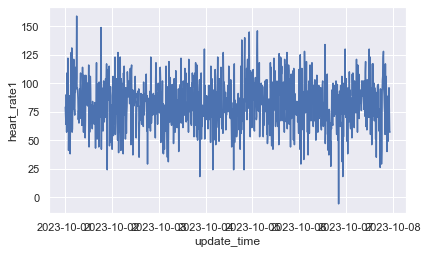

In [20]:
import seaborn as sns
sns.set(rc = {'figure.figsize' : (6.4, 3.8)})
sns.lineplot(x = data['update_time'], y = data['heart_rate1'])

In [22]:
import os
os.chdir('C:\\Users\\82107\\OneDrive\\바탕 화면\\KMU\\공부\TP\\prophet\\simulation')
data.to_csv('normal_simulation.csv')